With meridional regions of impact identified in the lat_time_impact notebook, the purpose of this script is now to average over those latitude bands, and inspect the vertical structure of the impact in those regions. These are plotted alongside a thin reproduced version of the relevant latitude band extracted from the lat_time_impact figure

In [16]:
import sys
import pdb
import numpy as np
import xarray as xr
import cmasher as cmr
import nclcmaps as ncm
import matplotlib as mpl
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import gridspec
from cftime import DatetimeNoLeap as date
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from cartopy.mpl.gridliner import LATITUDE_FORMATTER

plt.rcParams.update({
    'font.size'       : 14,   # Base font size
    'axes.labelsize'  : 13,   # Axis labels
    'xtick.labelsize' : 11,   # X-axis tick labels
    'ytick.labelsize' : 11,   # Y-axis tick labels
    'legend.fontsize' : 12,   # Legend font size
    'figure.titlesize': 16    # Figure title size
})
plt.ioff()

sys.path.insert(1, '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC')
import plotting_utils as putil

In [59]:
# ----- define latitude bands, pressure abd time limits
latbands = [[45, 65], [30, 50], [-5, 5], [-50, -30]]
nband     = len(latbands)

# ----- get U data on each band
udir = [putil.get_daily_variable('U', skip_nosrctag=True, latmin=b[0], latmax=b[1]) for b in latbands]
# ----- extract data at pressure levels
u        = [ud['ensmean'] for ud in udir]
u_cf     = [ud['cfmean'] for ud in udir]
u_impact = [ud['impact'] for ud in udir]
u_pval   = [ud['pval'] for ud in udir]
# ----- nan insignificant values
u_impact_filtered = [u_impact[i].where(u_pval[i] < 0.05) for i in range(nband)]
# ----- get dims
time, plev = [u[0].time, u[0].plev]
time = [datetime(t.year,t.month,t.day) for t in time.values]

# ----- now do the same for the non-zonally averaged data to reproduce the data from the lat_time_impact plot
udir = putil.get_daily_variable('U', skip_nosrctag=True)
up        = udir['ensmean']
up_cf     = udir['cfmean']
up_impact = udir['impact']
up_pval   = udir['pval']
up_impact_filtered = up_impact.where(up_pval < 0.05)#, other=0)
lat = up.lat

# ----- set limits
plim      = [400, 0.3]
timelim = [time[0], datetime(time[0].year+2,time[0].month,time[0].day)]

# ----- set signifiance threshold
pcrit = 0.05

getting data for variable U...

-------- processing ensemble zonal mean data...
doing slicing and averaging...
merging data
ensemble members found: 13
data shape after member concat: (13, 72, 222)
cf shape after member concat: (13, 72, 222)
getting impact
getting data ensemble mean
getting cf ensemble mean
getting impact ensemble mean
getting ttest
getting coherence
getting data for variable U...
getting data for variable U...
getting data for variable U...
getting data for variable U...


<>:73: SyntaxWarning: invalid escape sequence '\o'
<>:111: SyntaxWarning: invalid escape sequence '\o'
<>:73: SyntaxWarning: invalid escape sequence '\o'
<>:111: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_248224/1428748978.py:73: SyntaxWarning: invalid escape sequence '\o'
  dummy = ax1.plot([0,0],[0,0], color=ucolor, lw=ulw, alpha=ualph,label='counterfactual $\overline{{u}}$ every {} m/s ('.format(np.diff(ulev[i])[0]))
/tmp/ipykernel_248224/1428748978.py:111: SyntaxWarning: invalid escape sequence '\o'
  cb.set_label('$\overline{{u}}$ impact [m/s]')


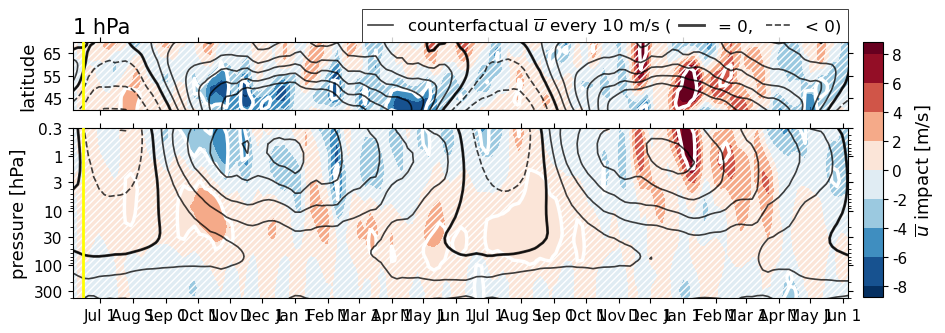

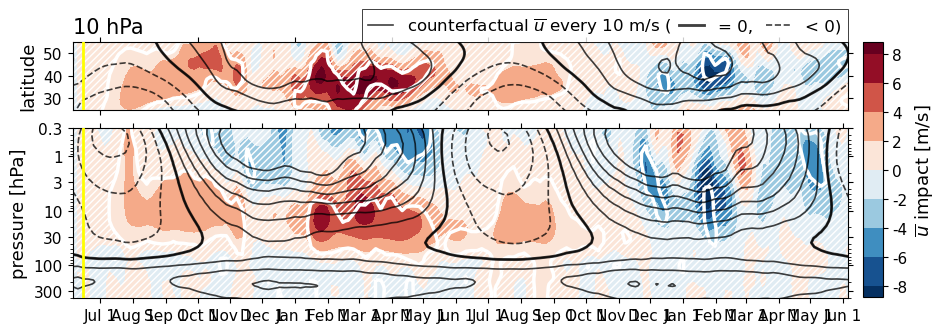

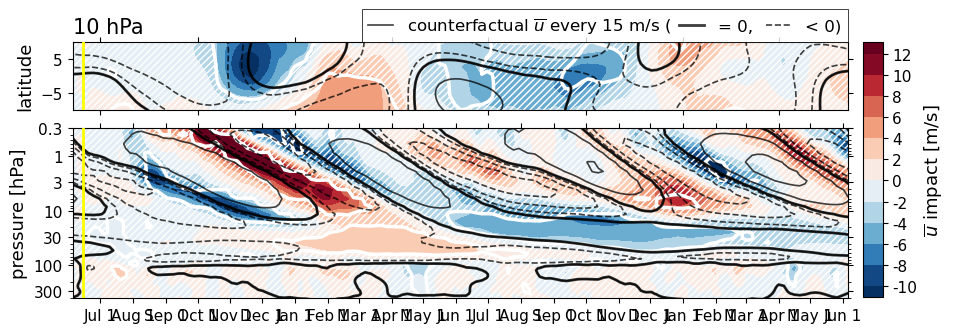

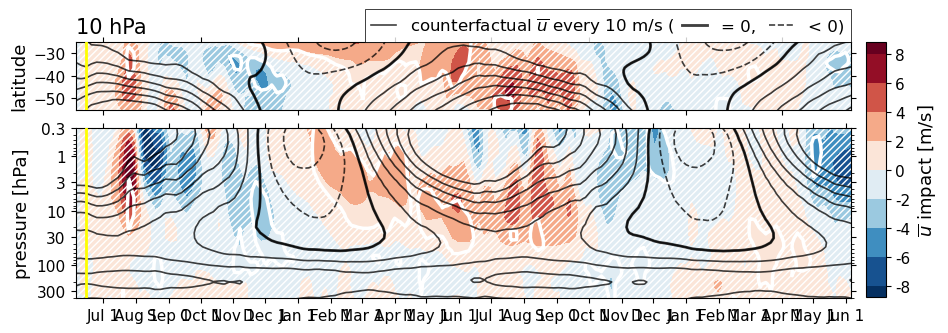

In [128]:
# ----- set levels
ilev = [np.arange(-8, 8+1, 2), np.arange(-8, 8+1, 2), 
        np.arange(-10, 12+1, 2), np.arange(-8, 8+1, 2)]     # impact levels
ulev = [np.arange(-30, 60+1, 10), np.arange(-30, 60+1, 10), 
        np.hstack([np.arange(-45, -15+1, 15), [-5, 0], np.arange(15, 45+1, 15)]), 
        np.arange(-30, 60+1, 10)] # data levels

# set pressure levels
ipp = [1, 10, 10, 10]

# ----- plotting settings
icmap       = 'RdBu_r' # impact colormap
isiglw      = 2.5      # significance contour linewidth
isigcolor   = 'w'      # significance contour color
ihatch      = '/////'  # insignificance hatching type
ihatchlw    = 1        # insignificance hatching linewidth
ihatchcolor = 'w'      # insignificance hatching color
ucolor      = 'k'      # contour color for U
ulw         = 1.2      # line width for U contours
ulwz        = ulw*1.7  # line width for U zero-line
ualph       = 0.75     # alpha for U contours
eqcolor     = 'm'      # equator line color 
eqls        = '-'      # equator linestyle
eqlw        = 1.5      # equator line width
eqalph      = 0.5      # equator alpha
ercolor     = 'yellow' # eruption line color 
erls        = '-'      # eruption linestyle
erlw        = 2        # eruption line width
cbheight = 0.765
cbpos = [0.915, (1-cbheight)/2-0.005, 
         0.02, cbheight] # colorbar position
mpl.rcParams['hatch.linewidth'] = ihatchlw
mpl.rcParams['hatch.color']     = ihatchcolor


for i in range(len(latbands)):    
    # ================= NORTH MIDLATS =================
    fig_width = 10
    fig = plt.figure(figsize=(fig_width, fig_width/3))
    gs  = gridspec.GridSpec(2, 1, height_ratios=[1, 2.5])

    # ========== first plot the pressure level data from lat_time_impact on this lat band
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    # ----- level settings
    inorm  = putil.get_cmap_norm(ilev[i], 'twoslope') # colormap normalization
    pargs  = {'plev':ipp[i], 'method':'nearest'}

    # --- ensemble data
    ax1.contour(time, lat, up_cf.sel(**pargs), colors=ucolor, linewidths=ulw, levels=ulev[i], alpha=ualph, zorder=10)
    ax1.contour(time, lat, up_cf.sel(**pargs), colors=ucolor, linewidths=ulwz, levels=[0], alpha=ualph, zorder=10)
    # --- impact data
    ax1.contourf(time, lat, up_impact.sel(**pargs), cmap=icmap, levels=ilev[i], norm=inorm, extend='both')
    # --- pval
    ax1.contourf(time, lat, up_pval.sel(**pargs), levels=[pcrit, up_pval.max()], hatches=[ihatch], alpha=0)
    ax1.contour(time, lat, up_pval.sel(**pargs), colors=isigcolor, levels=[pcrit], linewidths=isiglw)
    
    # --- eruption
    ax1.axvline(x=datetime(1991, 6, 15), color=ercolor, ls=erls, lw=erlw, zorder=11)

    # ----- format
    putil.season_timeticks(ax1.xaxis, time, 'season')
    ax1.set_ylabel('latitude')
    ax1.set_yticks(np.arange(latbands[i][0], latbands[i][1]+1, 10))
    ax1.set_ylim([latbands[i][0]-5, latbands[i][1]+5])
    ax1.set_xlim(timelim)
    ax1.tick_params(top=True, bottom=True, left=True, right=True, 
                    labeltop=False, labelbottom=False, labelleft=True, labelright=False, 
                    which='both')
    
    # ----- make legend
    dummy = ax1.plot([0,0],[0,0], color=ucolor, lw=ulw, alpha=ualph,label='counterfactual $\overline{{u}}$ every {} m/s ('.format(np.diff(ulev[i])[0]))
    dummy = ax1.plot([0,0],[0,0], color=ucolor, lw=ulwz, alpha=ualph,label='= 0, ')
    dummy = ax1.plot([0,0],[0,0], color=ucolor, lw=ulw, ls='--', alpha=ualph,label='< 0)')
    leg = ax1.legend(bbox_to_anchor=(1.011, 1.6), frameon=True, fancybox=False, edgecolor='k', ncol=3, columnspacing=0.5, handlelength=1.5)
    leg.get_frame().set_linewidth(0.66)
    
    # ----- make pressure label box
    ax1.text(0, 1.36, '{} hPa'.format(ipp[i]), transform=ax1.transAxes, verticalalignment='top', fontsize=15, zorder=1000,
        bbox=dict(facecolor='none', edgecolor='none'))
    
    # ========== now plot the band average p-time impact

    # --- ensemble data
    ax2.contour(time, plev, u_cf[i], colors=ucolor, linewidths=ulw, levels=ulev[i], alpha=ualph, zorder=10)
    ax2.contour(time, plev, u_cf[i], colors=ucolor, linewidths=ulwz, levels=[0], alpha=ualph, zorder=10)
    # --- impact data
    cfui = ax2.contourf(time, plev, u_impact[i], cmap=icmap, levels=ilev[i], norm=inorm, extend='both')
    # --- pval
    ax2.contourf(time, plev, u_pval[i], levels=[pcrit, u_pval[i].max()], hatches=[ihatch], alpha=0)
    ax2.contour(time, plev, u_pval[i], colors=isigcolor, levels=[pcrit], linewidths=isiglw)
    
    # --- eruption
    ax2.axvline(x=datetime(1991,6,15), color=ercolor, ls=erls, lw=erlw, zorder=11)
    # --- 10hPa
    ##ax2.axhline(y=10, color='yellow', ls='-', lw=2, zorder=300)

    # ----- format
    putil.season_timeticks(ax2.xaxis, time, 'month')
    ax2.set_ylabel('pressure [hPa]')
    ax2.set_ylim(plim)
    putil.format_paxis(ax2)
    ax2.set_xlim(timelim)
    ax2.tick_params(top=True, bottom=True, left=True, right=True, 
                    labeltop=False, labelbottom=True, labelleft=True, labelright=False, 
                    which='both')
    
    # ----- make colorbar
    cb = fig.colorbar(cfui, cax=fig.add_axes(cbpos), orientation='vertical', location='right', format='%d', extendrect=True)
    cb.set_label('$\overline{{u}}$ impact [m/s]')
    cb.set_ticks(ilev[i])
    
    # ----- format subplots
    fig.subplots_adjust(hspace=0.15)
                 
plt.show()